In [35]:
import numpy as np
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from gensim.models import KeyedVectors
from openpyxl import load_workbook

## Extracting Data (from topics excel file)

In [36]:
data_path = "data"
topics_file = "lda_topics_by_division.xlsx"

topic_keyphrase_lists = {}
wb = load_workbook(f"{data_path}/{topics_file}", data_only=True)

for sheet_name in wb.sheetnames:
    ws = wb[sheet_name]
    print("\nTopic:", sheet_name)

    keyphrases = []
    for row in ws.iter_rows(min_col=2, min_row=2, values_only=True):
        #print(list(row))
        keyphrases.append(list(row))
    
    topic_keyphrase_lists[sheet_name] = keyphrases


Topic: Technology Innovation

Topic: Chemical, Bioengineering, Envir

Topic: Biological Infrastructure

Topic: Mathematical Sciences

Topic: Civil, Mechanical and Manufactu

Topic: Research on Innovative Technolo

Topic: Computer and Network Systems

Topic: Ocean Sciences

Topic: Information & Intelligent Syste

Topic: Research on Learning

Topic: Physics

Topic: Social and Economic Sciences

Topic: Behavioral and Cognitive Scienc

Topic: Advanced Cyberinfrastructure

Topic: Electrical, Communications and 

Topic: Materials Research

Topic: Engineering Education and Cente

Topic: Computing and Communication Fou

Topic: Atmospheric and Geospace Scienc

Topic: Emerging Frontiers

Topic: Chemistry

Topic: Earth Sciences

Topic: EPSCoR

Topic: Polar Programs

Topic: Undergraduate Education

Topic: SBE Multidisciplinary Activitie

Topic: Integrative Organismal Systems

Topic: Graduate Education

Topic: Astronomical Sciences

Topic: Integrative Activities

Topic: Environmental Biology

Topi

## Function Setup

In [37]:
def topic_centroid(keyphrases, model):
    keyphrases_clean = [k.replace("_", " ") for k in keyphrases]
    embs = model.encode(keyphrases_clean, normalize_embeddings=True)
    centroid = embs.mean(axis=0) # calculate "centroid" of embedding vals
    
    centroid = centroid / (np.linalg.norm(centroid) + 1e-9) # re-normalize centroid
    return centroid

## Loading Model

In [38]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")

## Analysis

In [39]:
topic_embs = {}

for topic in topic_keyphrase_lists.keys():
    topic_vectors = []

    for keyphrase_list in topic_keyphrase_lists[topic]:
        emb = topic_centroid(keyphrase_list, model)
        topic_vectors.append(emb)
    
    topic_embs[topic] = topic_vectors

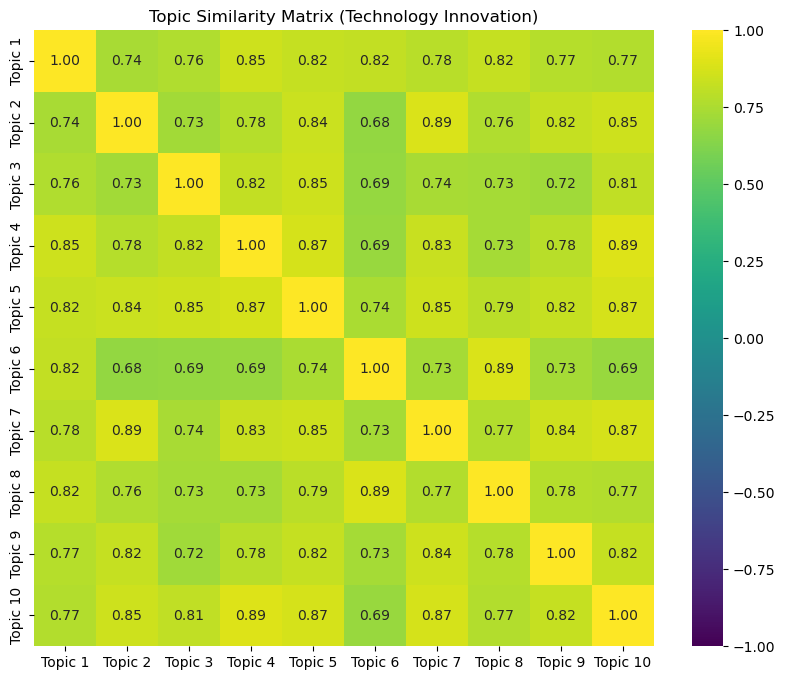

In [40]:
for topic in topic_embs.keys():
    topic_vectors = np.vstack(topic_embs[topic])
    topic_sim_matrix = topic_vectors @ topic_vectors.T

    topic_ids = [f"Topic {i + 1}" for i in range(len(topic_vectors))]

    # Convert to df for cleaner display
    sim_df = pd.DataFrame(topic_sim_matrix, index=topic_ids, columns=topic_ids)

    plt.figure(figsize=(10, 8))
    sns.heatmap(sim_df, annot=True, fmt=".2f", cmap="viridis", vmin=-1, vmax=1)
    plt.title(f"Topic Similarity Matrix ({topic})")
    plt.show()

    break # only displaying first for now, comment out for full output



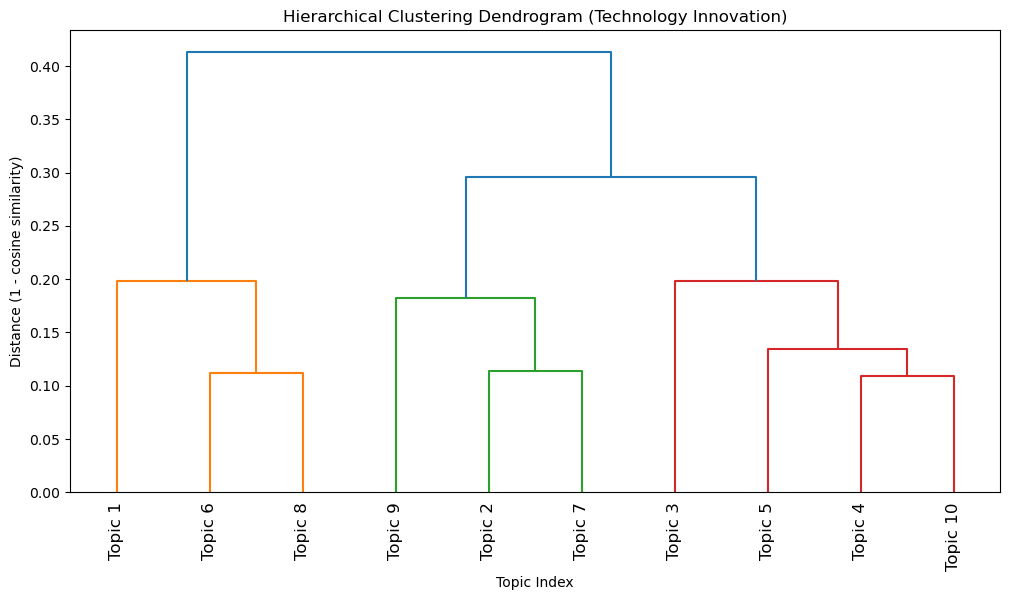

In [41]:
for topic in topic_embs.keys():
    topic_vectors = np.vstack(topic_embs[topic])

    dist_matrix = pdist(topic_vectors, metric="cosine")

    # hierarchical clustering
    Z = linkage(dist_matrix, method="ward")

    topic_ids = [f"Topic {i + 1}" for i in range(len(topic_vectors))]

    plt.figure(figsize=(12, 6))
    dendrogram(Z, labels=topic_ids, leaf_rotation=90)
    plt.title(f"Hierarchical Clustering Dendrogram ({topic})")
    plt.xlabel("Topic Index")
    plt.ylabel("Distance (1 - cosine similarity)")
    plt.show()

    break # only displaying first for now, comment out for full output
